## MI-DDW - Social Network Analysis

### Networkx

In [ ]:
! pip3 install networkx

In [77]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

### Basic Operations

#### Graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# new Graph
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_edges_from([(1,2),(1,3)])

# accessing nodes/edges
print(G.nodes())
print(G.edges())
print(G.neighbors(1))
print(G[1])
print(G[1][2])

[1, 2, 3]
[(1, 2), (1, 3)]
{2: {}, 3: {}}
{}


#### Graph attributes

In [2]:
# attributes
G.nodes[1]['room'] = 714
print(G.nodes(data=True))
G[1][2]['weight'] = 4.7
print(G.edges(data=True))

[(1, {'room': 714}), (2, {}), (3, {})]
[(1, 2, {'weight': 4.7}), (1, 3, {})]


#### Directed graphs

In [3]:
# directed graphs
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
print(DG.out_degree(1))
print(DG.degree(1))

1
2


#### Drawing

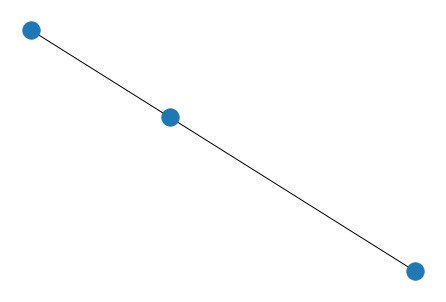

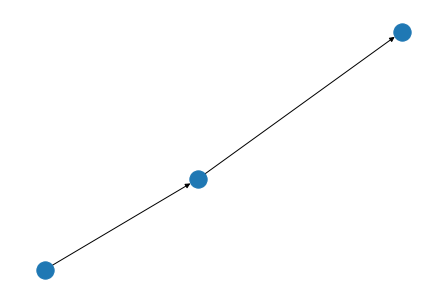

In [4]:
# drawing
#plt.clf()
nx.draw(G)
plt.show()
#plt.savefig("G.png")

#drawing
#plt.clf()
nx.draw(DG)
plt.show()
#plt.savefig("DG.png")

#### Visualization layout

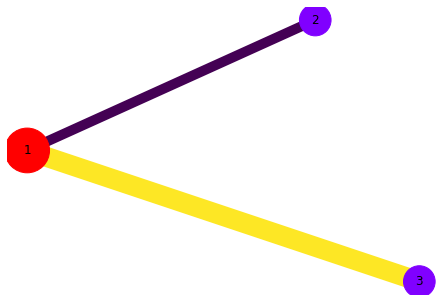

In [5]:
# %matplotlib notebook|inline
from networkx.drawing.nx_agraph import graphviz_layout
plt.clf()
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[G.degree(v) for v in G],
        node_size=[1000*G.degree(v) for v in G],
        width = [(i+1)*10 for i,e in enumerate(G.edges())],
        edge_color = [(i+1)*10 for i,e in enumerate(G.edges())]
       )
# plt.savefig("layout.png")
plt.show()

#### Graph operations
```
subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
````

### Social Network Analysis methods

#### Components

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
{32, 33, 34, 36, 37, 30}
{35}
{38, 39}
{31}
{40}
{41, 44}
{42, 43}
{48, 49, 45, 47}
{46}
{50}


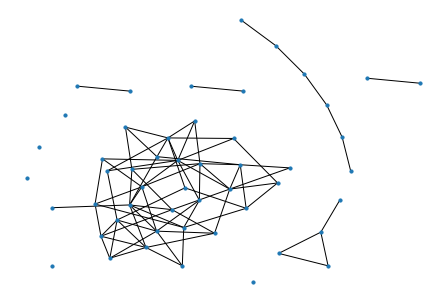

In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
plt.clf()
G = nx.random_partition_graph([30,10,5,5,1], 0.15, 0.001, seed=5)
pos = graphviz_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10)
# plt.savefig("components.png")
#plt.show()

for component in nx.connected_components(G):
    print(component)

#### Centralities

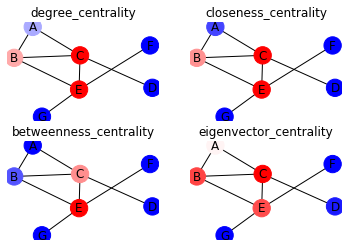

In [7]:
data= {"B":["A","E"], "C":["A", "B", "D", "E"], "E":["F","G"]}
G=nx.from_dict_of_lists(data)
pos = graphviz_layout(G, prog="fdp")
centralities = [nx.degree_centrality, nx.closeness_centrality,
 nx.betweenness_centrality, nx.eigenvector_centrality]
region=220
for centrality in centralities:
    region+=1
    plt.subplot(region)
    plt.title(centrality.__name__)
    nx.draw(G, pos, labels={v:str(v) for v in G},
      cmap = plt.get_cmap("bwr"), node_color=[centrality(G)[k] for k in centrality(G)])
# plt.savefig("centralities.png")
# plt.show()

#### Communities

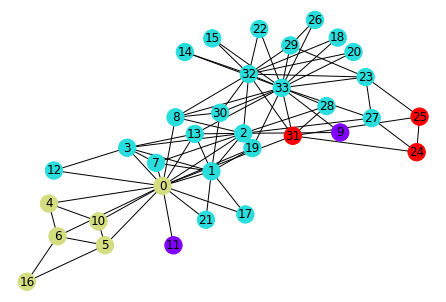

In [8]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
G=nx.karate_club_graph()
communities = {node:cid+1 for cid,community in enumerate(nx.algorithms.community.k_clique_communities(G,3)) for node in community}

pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[communities[v] if v in communities else 0 for v in G])
# plt.savefig("communities.png")
# plt.show()

In [167]:
G = nx.read_gml('./lesmis.gml')

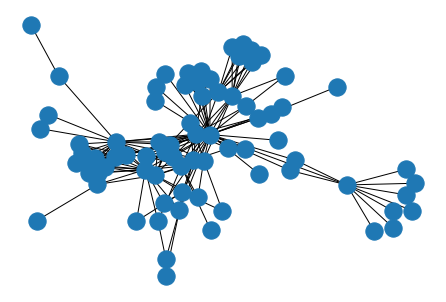

In [24]:
nx.draw(G)
plt.show()

## Statistics

In [107]:
nodes_count = G.number_of_nodes()
edges_count = G.number_of_edges()
print("Number of nodes: " + str(nodes_count))
print("Number of edges: " + str(edges_count))

print("Density si: " + str(nx.classes.function.density(G)))

Number of nodes: 77
Number of edges: 254
Density si: 0.08680792891319207


## Metrics

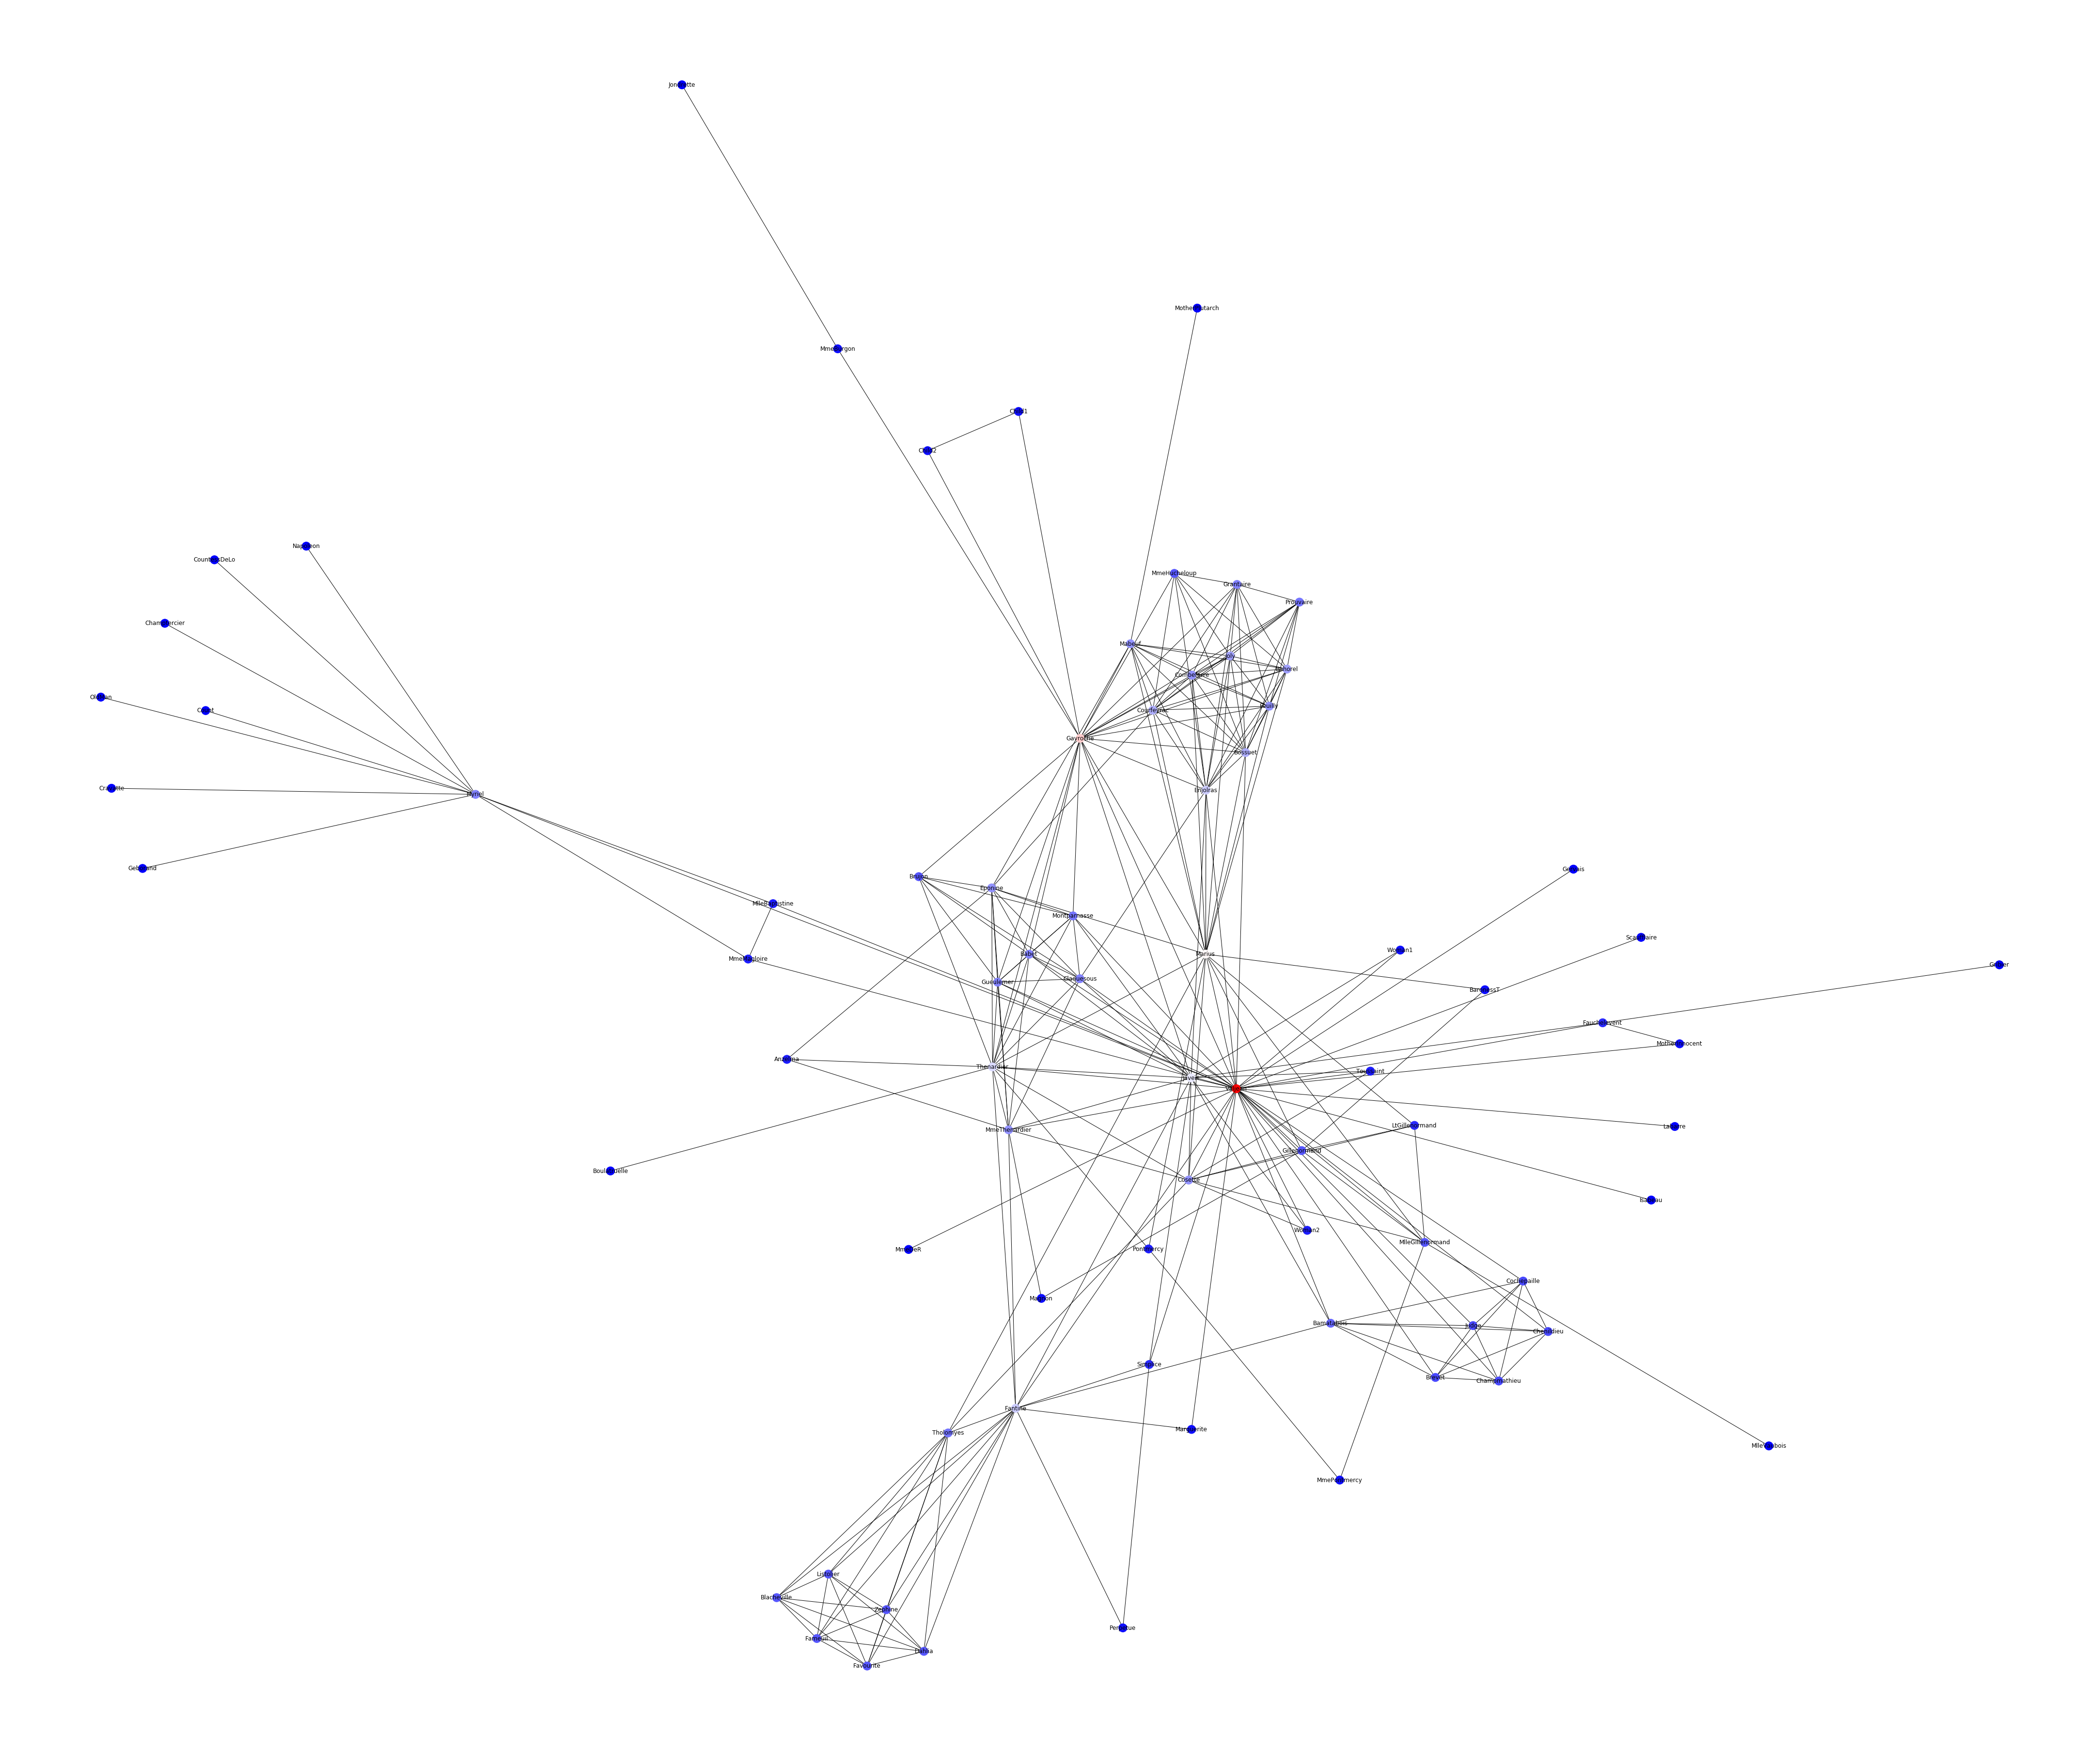

In [73]:
nx.draw(G,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("bwr"),
        node_color=[G.degree(v) for v in G],
        font_size=12
       )

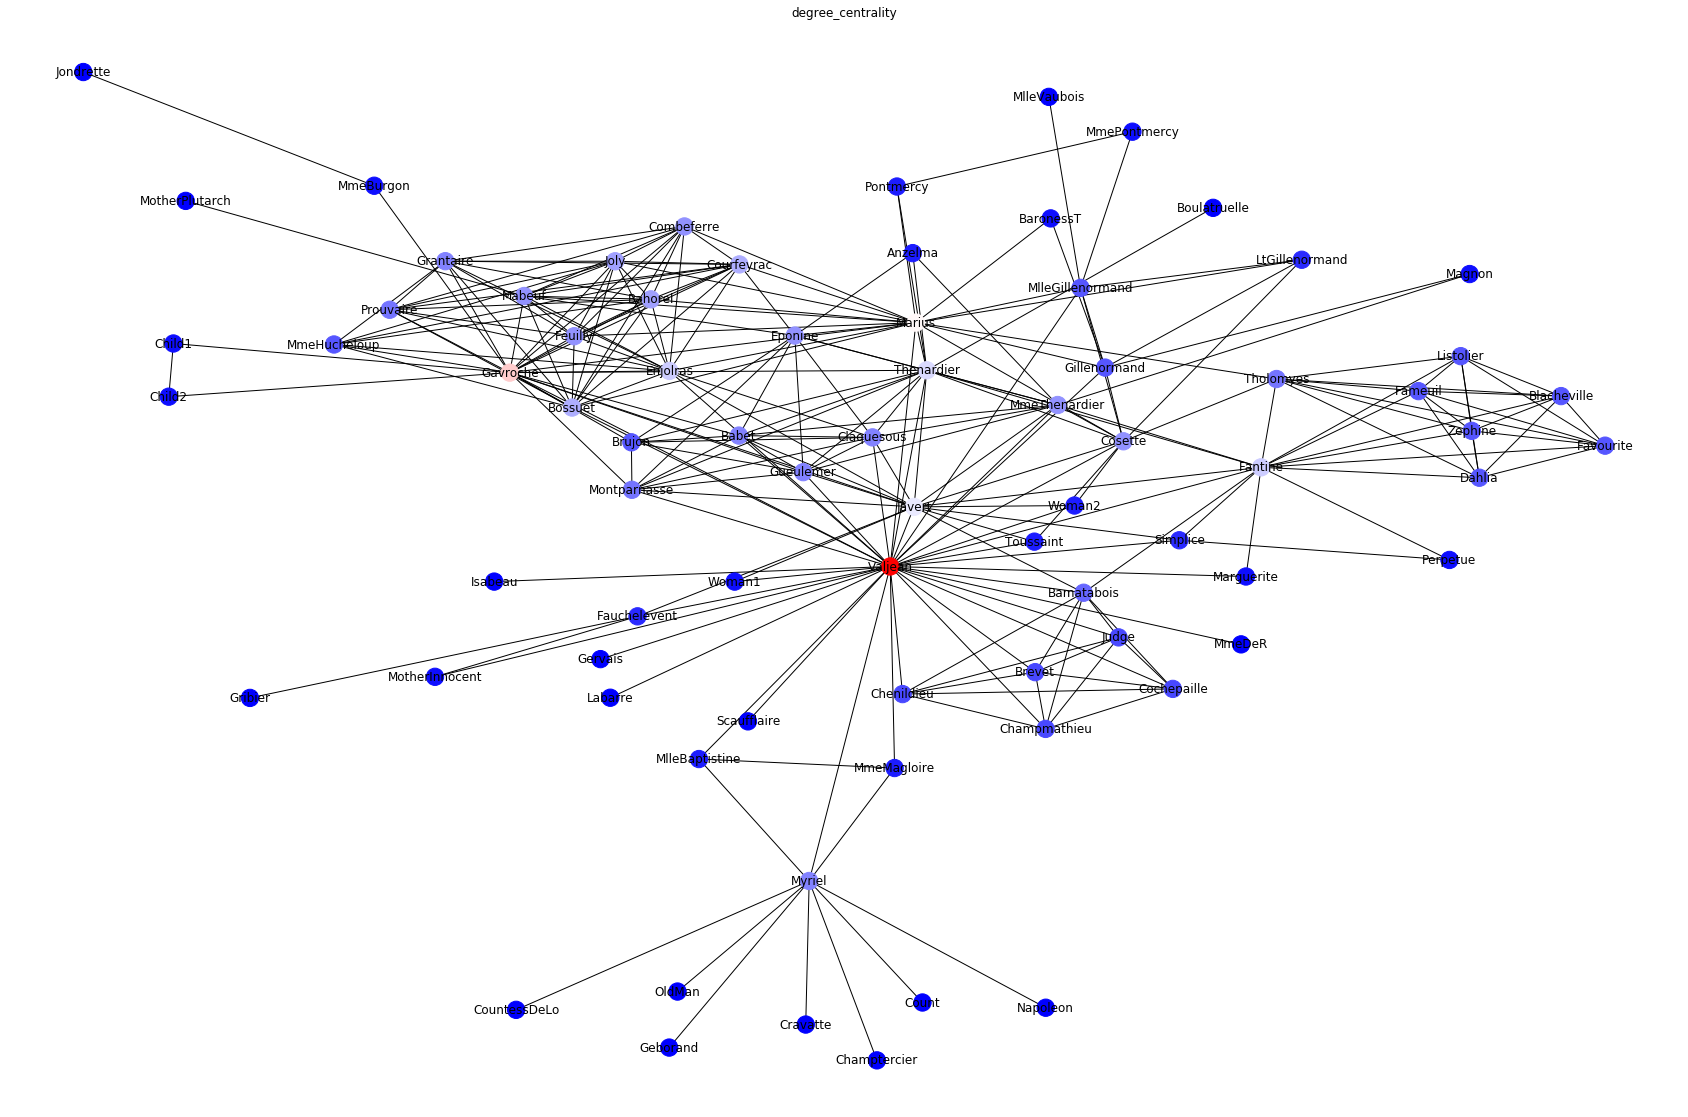

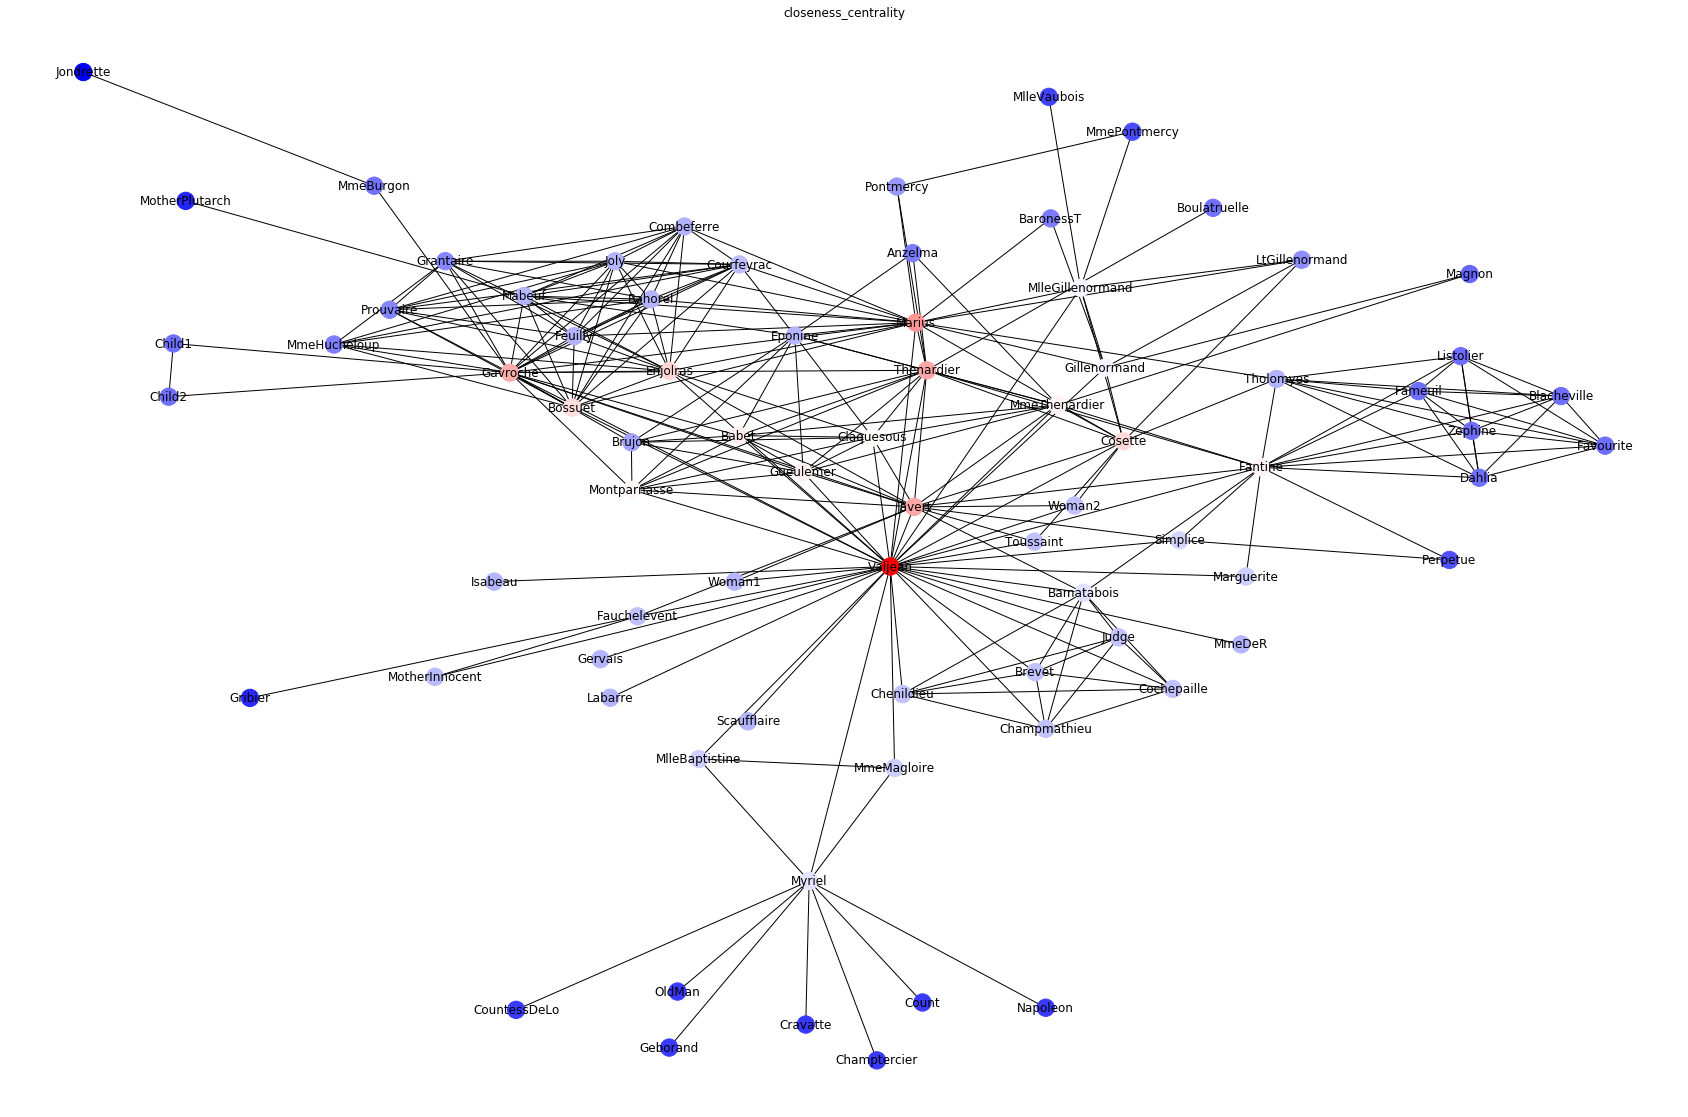

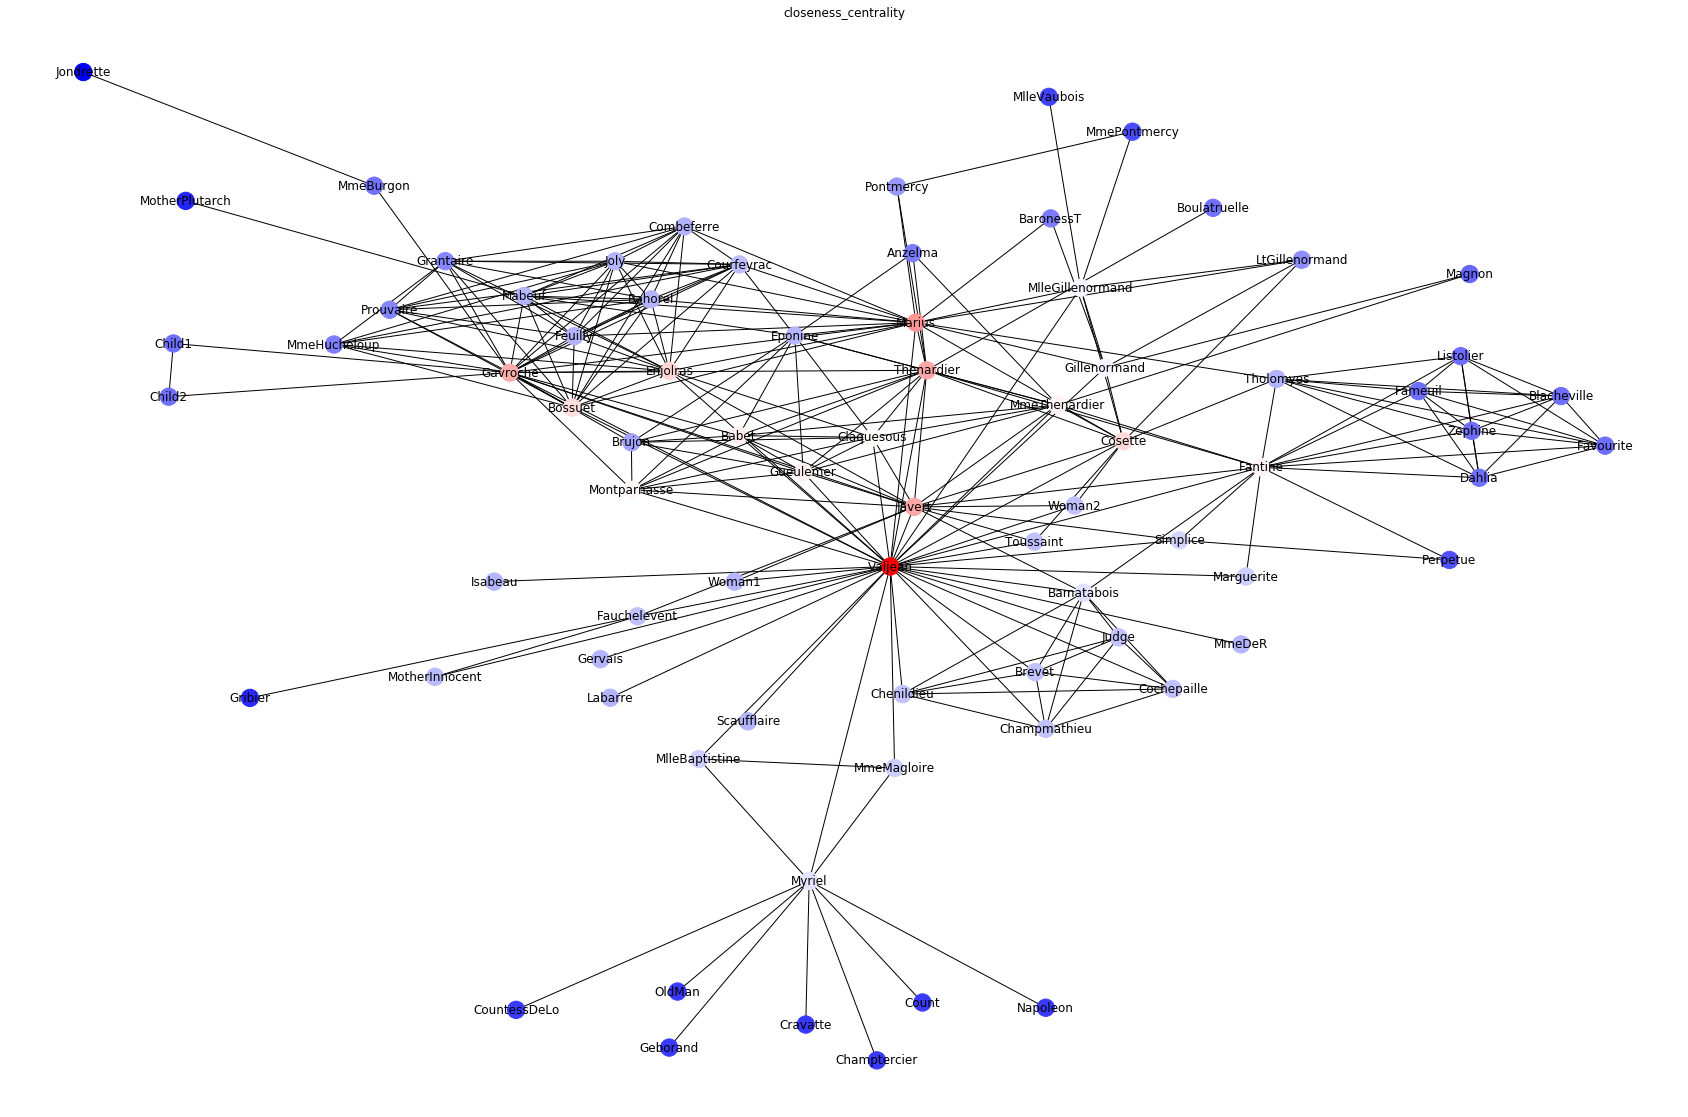

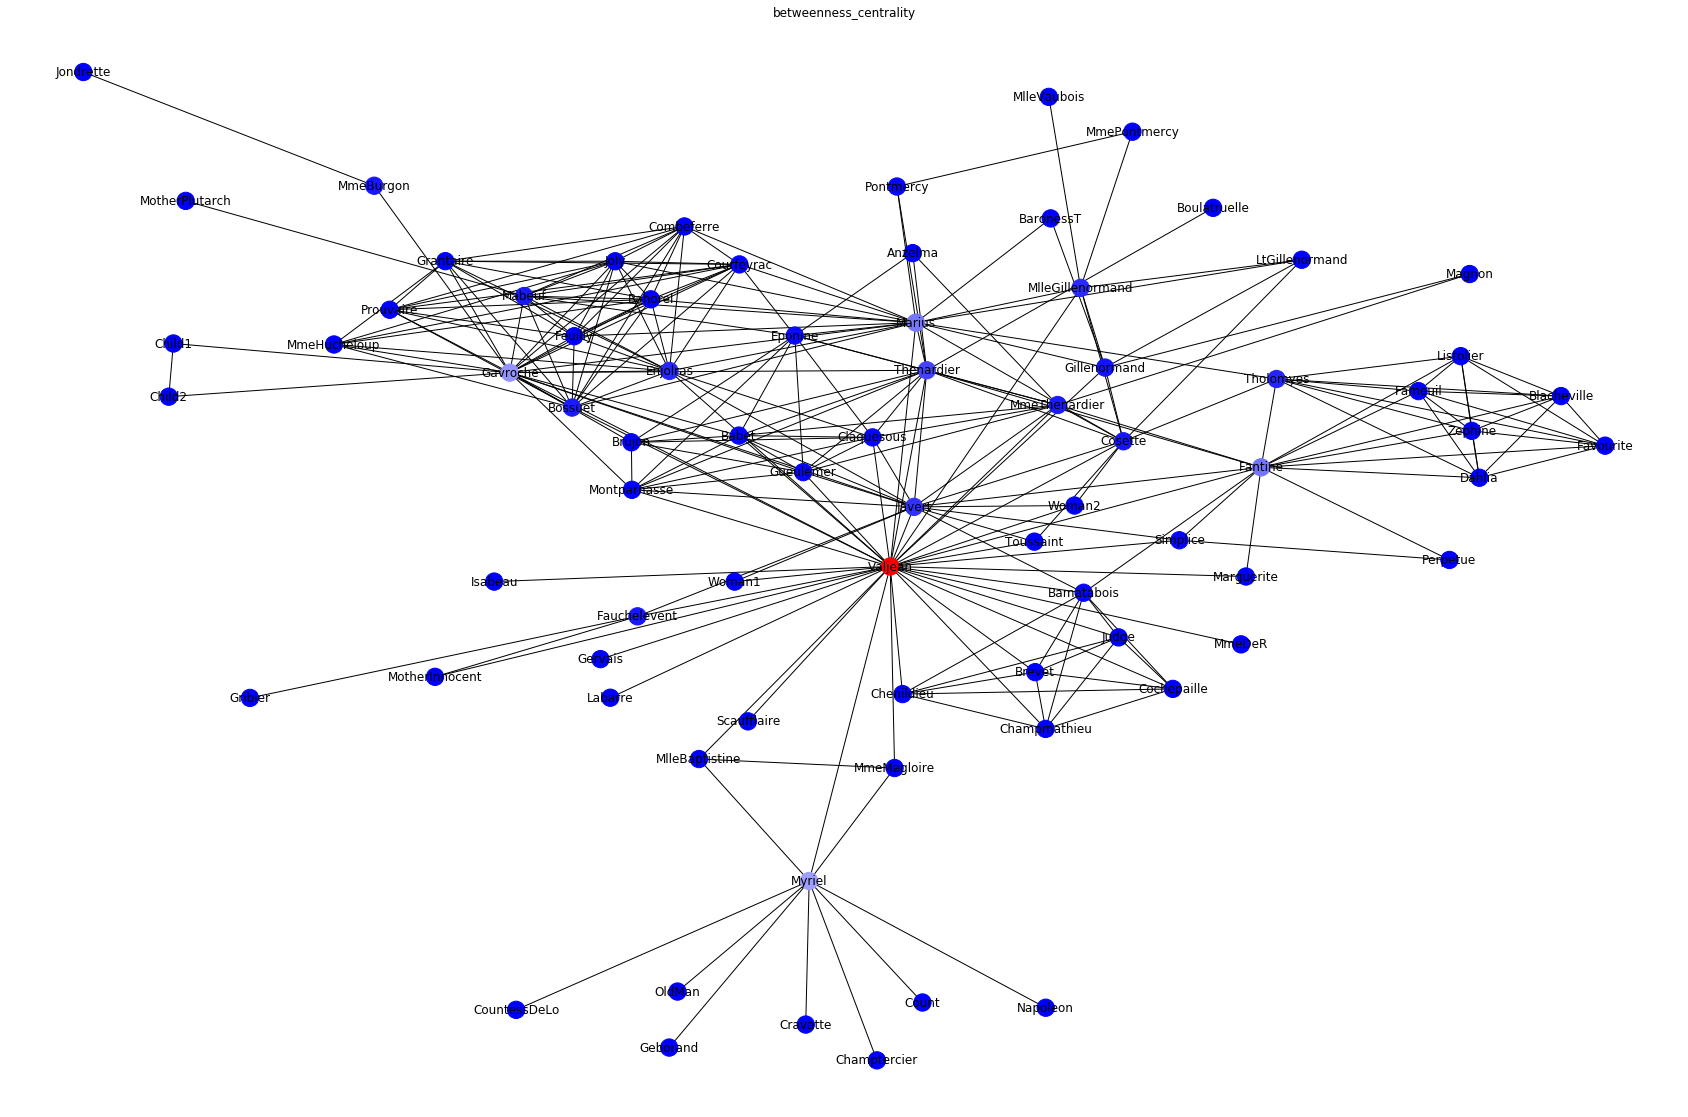

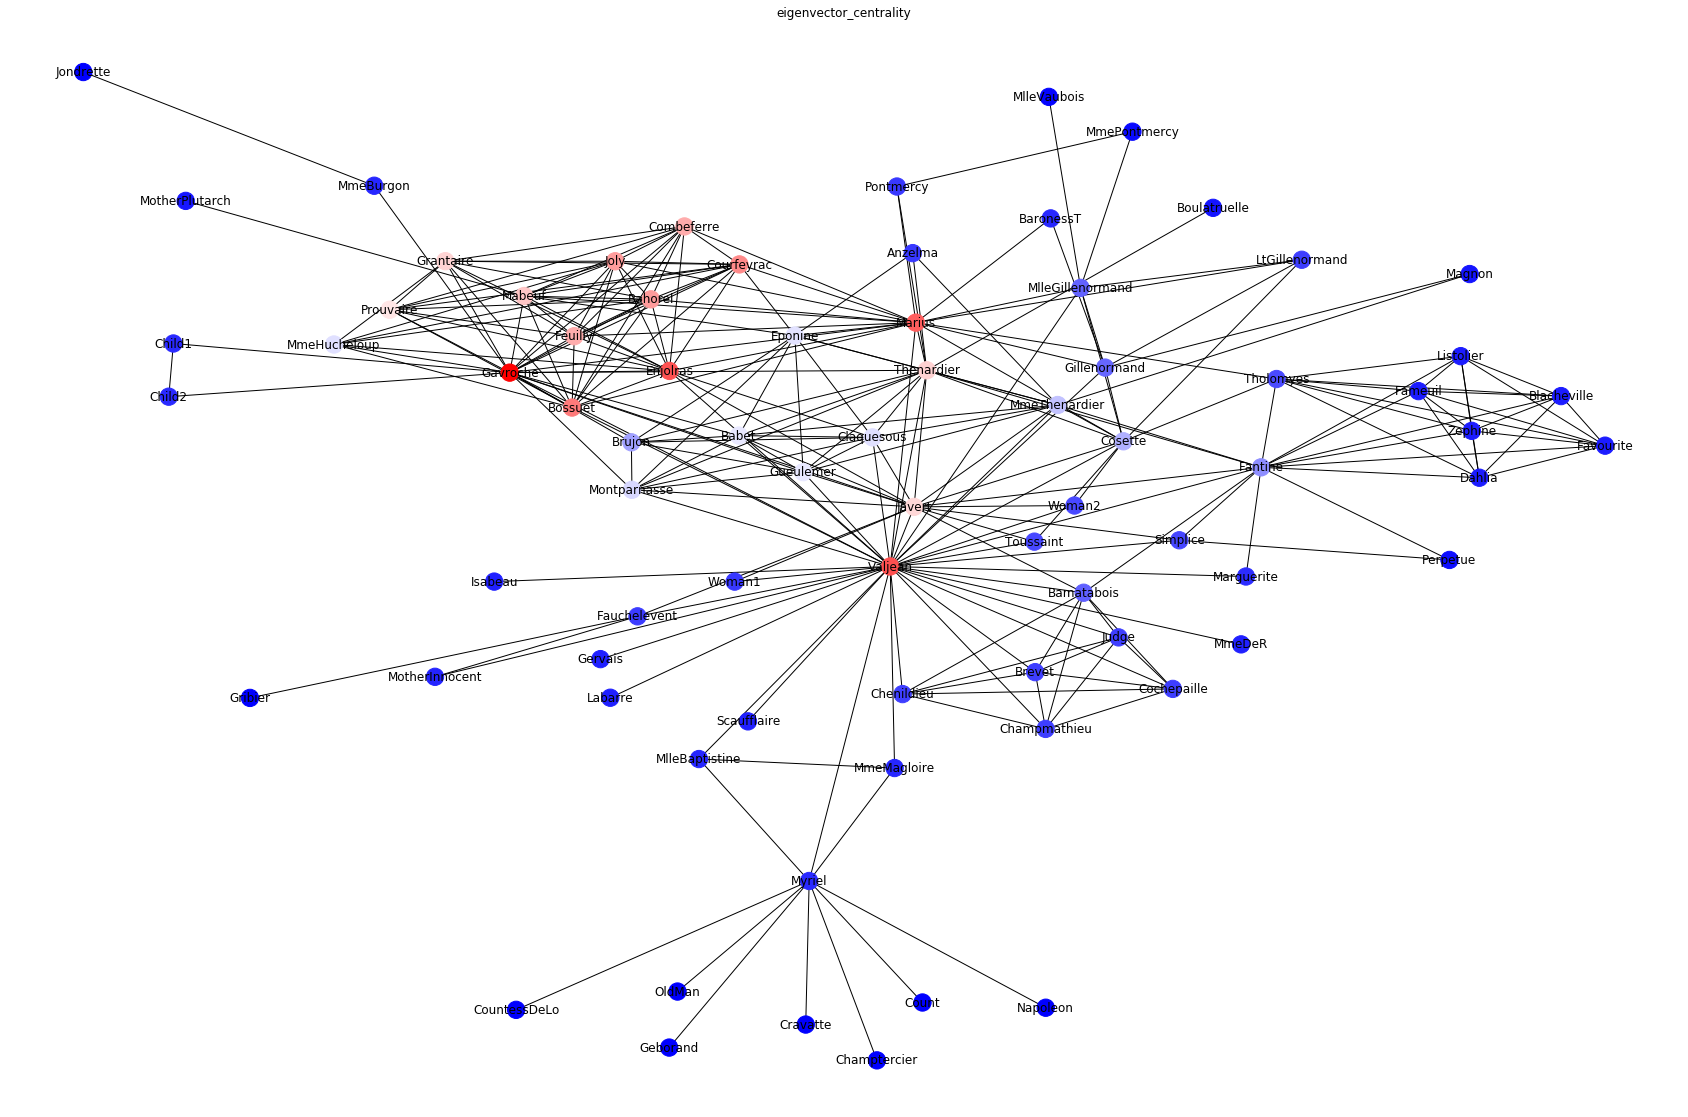

In [78]:
pos = graphviz_layout(G, prog="fdp")
centralities = [nx.degree_centrality, nx.closeness_centrality,nx.closeness_centrality, nx.betweenness_centrality, nx.eigenvector_centrality]
i = 1;
for centrality in centralities:
    plt.figure(i)
    plt.title(centrality.__name__)
    i=i+1
    nx.draw(G, pos, labels={v:str(v) for v in G},
    cmap = plt.get_cmap("bwr"), node_color=[centrality(G)[k] for k in centrality(G)])
    plt.show()

In [100]:
communities = {node:cid+1 for cid,community in enumerate(nx.algorithms.community.k_clique_communities(G,3)) for node in community}
communities

{'Cosette': 1,
 'Gavroche': 2,
 'Javert': 1,
 'Pontmercy': 1,
 'BaronessT': 1,
 'Perpetue': 1,
 'Chenildieu': 1,
 'Champmathieu': 1,
 'Anzelma': 1,
 'Thenardier': 1,
 'MotherInnocent': 1,
 'Woman1': 1,
 'Gillenormand': 1,
 'Prouvaire': 1,
 'Joly': 1,
 'Cochepaille': 1,
 'MmeHucheloup': 1,
 'Brevet': 1,
 'Fantine': 3,
 'Valjean': 4,
 'Mabeuf': 1,
 'Combeferre': 1,
 'Enjolras': 1,
 'MmeThenardier': 1,
 'Gueulemer': 1,
 'Brujon': 1,
 'MlleGillenormand': 1,
 'Feuilly': 1,
 'Woman2': 1,
 'Fauchelevent': 1,
 'Bossuet': 1,
 'LtGillenormand': 1,
 'Marius': 1,
 'Grantaire': 1,
 'Tholomyes': 3,
 'Marguerite': 1,
 'Babet': 1,
 'Claquesous': 1,
 'Montparnasse': 1,
 'Eponine': 1,
 'Courfeyrac': 1,
 'Bamatabois': 1,
 'Simplice': 1,
 'Toussaint': 1,
 'Bahorel': 1,
 'Judge': 1,
 'Child1': 2,
 'Child2': 2,
 'Dahlia': 3,
 'Fameuil': 3,
 'Zephine': 3,
 'Listolier': 3,
 'Blacheville': 3,
 'Favourite': 3,
 'MmeMagloire': 4,
 'Myriel': 4,
 'MlleBaptistine': 4}

In [106]:
list(nx.bridges(G))

[('Myriel', 'Napoleon'),
 ('Myriel', 'CountessDeLo'),
 ('Myriel', 'Geborand'),
 ('Myriel', 'Champtercier'),
 ('Myriel', 'Cravatte'),
 ('Myriel', 'Count'),
 ('Myriel', 'OldMan'),
 ('Labarre', 'Valjean'),
 ('Valjean', 'MmeDeR'),
 ('Valjean', 'Isabeau'),
 ('Valjean', 'Gervais'),
 ('Valjean', 'Scaufflaire'),
 ('Thenardier', 'Boulatruelle'),
 ('Fauchelevent', 'Gribier'),
 ('Jondrette', 'MmeBurgon'),
 ('MmeBurgon', 'Gavroche'),
 ('MlleGillenormand', 'MlleVaubois'),
 ('Mabeuf', 'MotherPlutarch')]

## Key Players (Top 10)

In [116]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]

[('Valjean', 36),
 ('Gavroche', 22),
 ('Marius', 19),
 ('Javert', 17),
 ('Thenardier', 16),
 ('Fantine', 15),
 ('Enjolras', 15),
 ('Courfeyrac', 13),
 ('Bossuet', 13),
 ('Bahorel', 12)]

## Visualize Clusters/Communities

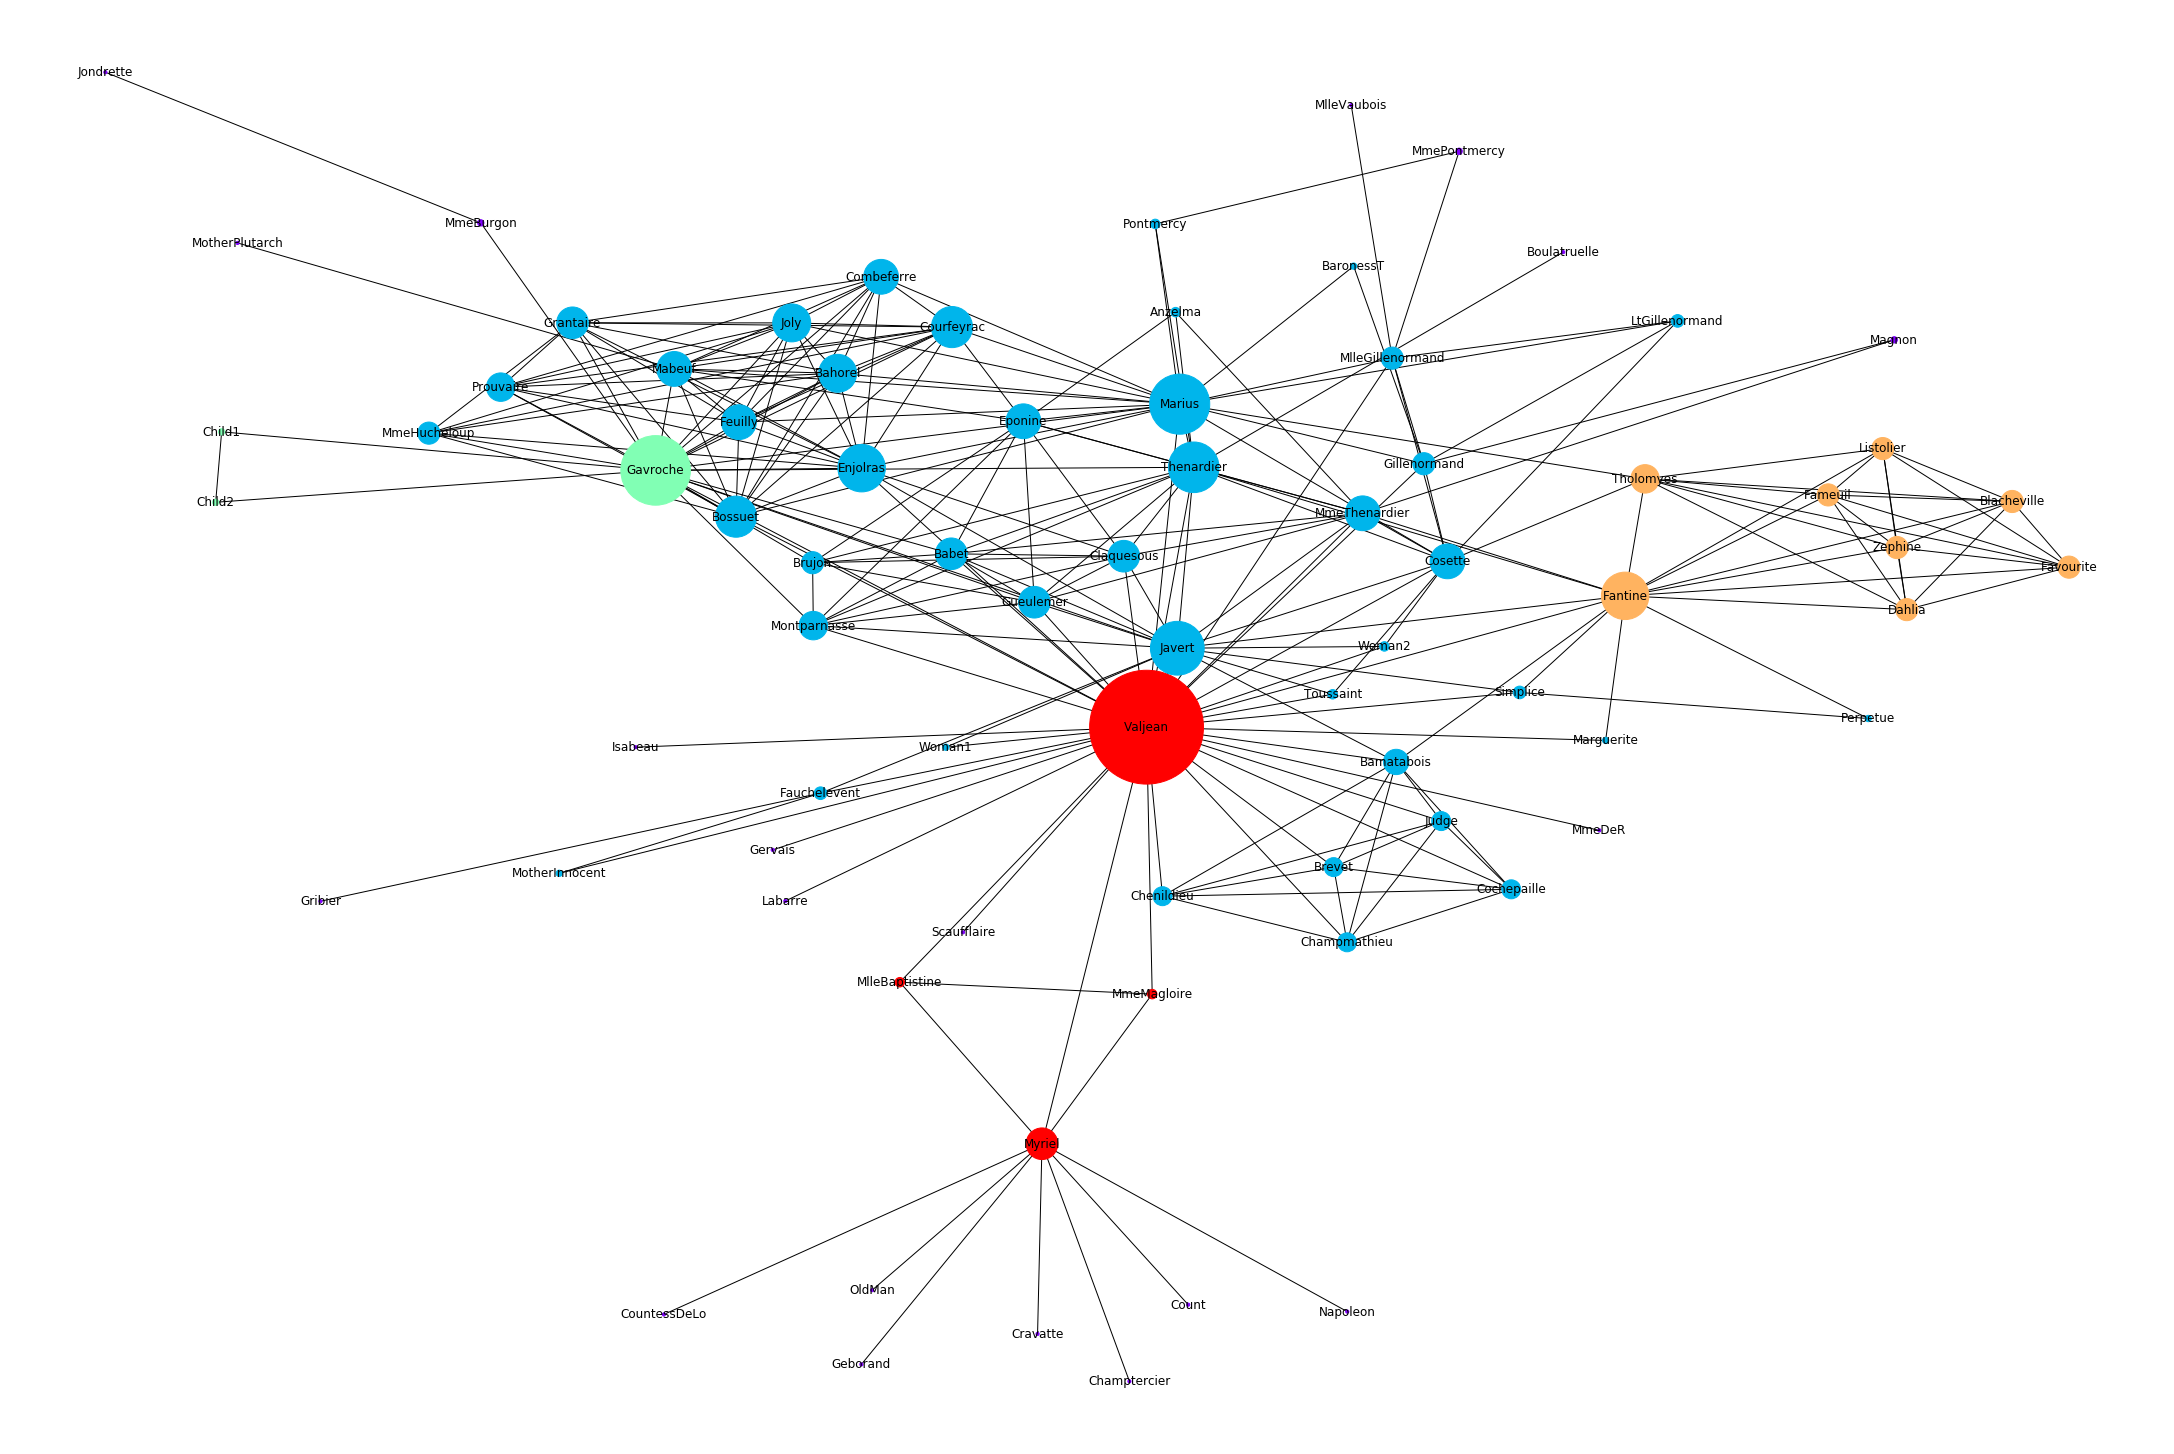

In [168]:
communities = {node:cid+1 for cid,community in enumerate(nx.algorithms.community.k_clique_communities(G,3)) for node in community}
d = list(nx.degree(G))
sizes = [a[1]*a[1]*10 for a in d] 
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[communities[v] if v in communities else 0 for v in G],
        node_size=sizes)

## Export to GEXF

In [170]:
nx.write_gexf(G, "export.gexf")

## Exported to Graph

And this is the result:

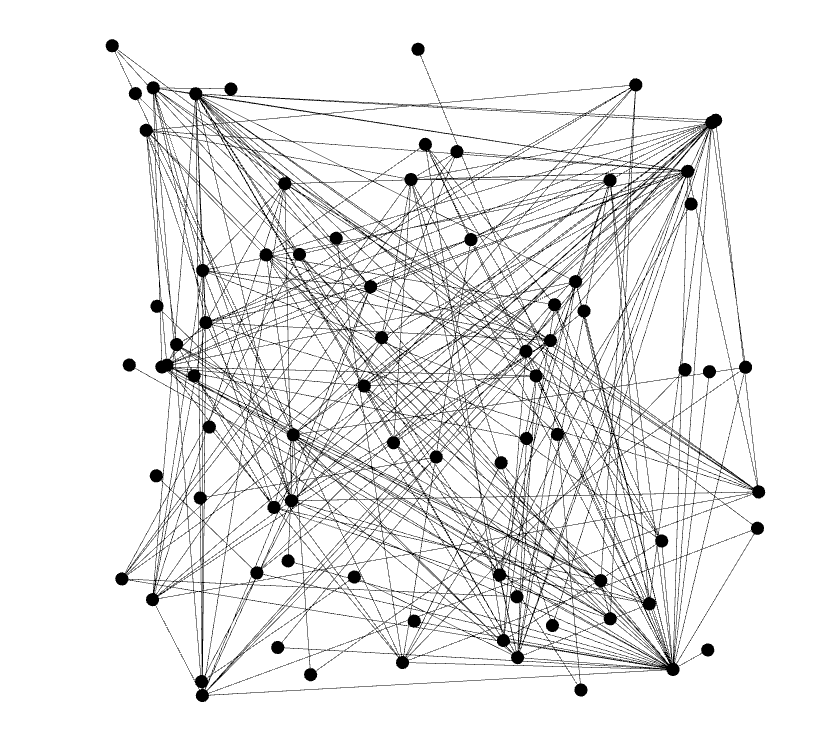